<a href="https://colab.research.google.com/github/shlok-py/DeerHack2023-BroCode/blob/AudioClassification/wildlife_audio_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing and Importing Dependecies

In [ ]:
!pip install tensorflow_io
!pip install python_speech_features
!pip install kapre

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 33.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5886 sha256=07c741e687d30c981e2a19c1e219d484e8cb1566ee25566708e3924c1b4e6799
  Stored in directory: /root/.cache/pip/wheels/5a/9e/68/30bad9462b3926c29e315df16b562216d12bdc215f4d240294
Successfully built python_speech_features
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for kapre: filename=kapre-0.3.7-py3-none-any.whl size=29623 sha256=045709a9a3c27085cd8e3654c887481a8d1

In [ ]:
import os
import shutil
# import librosa
import tensorflow as tf
# import tensorflow_io as tfio
from tensorflow.keras import layers
# from tensorflow.keras.layers import TimeDistributed, LayerNormalization
from tensorflow.keras.models import Model
# from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# import kapre
# from kapre.composed import get_melspectrogram_layer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io import wavfile
from python_speech_features import mfcc, logfbank
import librosa
from tqdm import tqdm
from sklearn.utils.class_weight import compute_class_weight

# Mount Drive

### Our Dataset lies in our Drive So, we mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Preparing Datasets
### The audio data we possess is self created, synthetic data + data takes from different Open source channels. So, it needs to be well preproccessed and fine-tuned before modelling.

In [ ]:
# Set the Dataset paths
Datasets_path = "/content/drive/MyDrive/Research Papers for SVED/Audio_datasets"
train_path = "/content/data/train"
test_path = "/content/data/test"

In [ ]:
# Preview the dataset from the dataset_path
# labels = os.listdir(Datasets_path)
# print(len(os.listdir(Datasets_path)))


animallist =['Spotted_Dove', 'Spiny_Babbler','Bear', 'Car_Horn', 'Cheetah', 'Deer', 'Elephant', 'Engine_Idling', 'Fire_Sound','Gun_Shot','Human','Monkey', 'Rhino', 'Tiger', 'Wolf']

'''
animallist are list of 15 different Sound events that can probably happen in jungle areas. The sound event
consists of different canivorous animals and human sounds
'''

print(len(animallist))
for label_name in animallist:
  no_of_files = len(os.listdir(os.path.join(Datasets_path,label_name)))
  print(label_name,"---------------->",no_of_files)

15
Spotted_Dove ----------------> 110
Spiny_Babbler ----------------> 110
Bear ----------------> 110
Car_Horn ----------------> 110
Cheetah ----------------> 110
Deer ----------------> 110
Elephant ----------------> 110
Engine_Idling ----------------> 110
Fire_Sound ----------------> 102
Gun_Shot ----------------> 110
Human ----------------> 110
Monkey ----------------> 110
Rhino ----------------> 110
Tiger ----------------> 110
Wolf ----------------> 110


In [ ]:
#Code to Make Directories for train and test
animallist =['Spotted_Dove', 'Spiny_Babbler','Bear', 'Car_Horn', 'Cheetah', 'Deer', 'Elephant', 'Engine_Idling', 'Fire_Sound','Gun_Shot','Human','Monkey', 'Rhino', 'Tiger', 'Wolf']
def makeDirs(train_path, test_path):
  '''
  This function makes required directories for train and test data
  train_path = "/content/data/train"
  test_path = "/content/data/test"

  the variable 'i' is the label folder where sound files are kept
  '''
  for i in animallist:
    os.makedirs(os.path.join(train_path,i))
    os.makedirs(os.path.join(test_path,i))


In [ ]:
# shutil.rmtree("/content/data")
'''
This code is for debugging and emergency purpose. Deletes data directory
'''

In [ ]:
def train_test_split():
  '''
  This function splits train and test data. The train test ratio is 80-20%
  '''

  for i in animallist:
    k = 0
    for j in os.listdir(os.path.join(Datasets_path,i)):
      if k<= 0.8*len(os.listdir(os.path.join(Datasets_path,i))):
        shutil.copy(os.path.join(Datasets_path,i,j), os.path.join(train_path,i))
        k +=1
        print(f"File {j} moved to train", k)
      else:
        shutil.copy(os.path.join(Datasets_path, i,j), os.path.join(test_path,i))
        print(f"File {j} moved into test")

In [ ]:
#Create CSV of the data
def make_csv(train_path, file_name):
  '''
  This function makes labelled csv of train data
  '''
  Filename = []
  # filepath = []
  classes = []
  labels = os.listdir(train_path)
  for label_name in labels:
    for filename in os.listdir(os.path.join(train_path,label_name)):
      os.rename(os.path.join(train_path,label_name,filename), os.path.join(train_path,label_name,label_name + filename))
      Filename.append(label_name + filename)
      # filepath.append(os.path.join(train_path))
      classes.append(label_name)
  data = {
      'filename': Filename,
      'label': classes
  }
  df = pd.DataFrame(data)
  df.to_csv(f"/content/{file_name}")

In [ ]:
#Run all three function defined above
makeDirs(train_path, test_path)
train_test_split()
make_csv(train_path, "audio_data.csv")

# make_csv(train_path, "train_data.csv")

File XC312465 0.wav moved to train 1
File XC312465 1.wav moved to train 2
File XC312465 3.wav moved to train 3
File XC312465 4.wav moved to train 4
File XC352026 3.wav moved to train 5
File XC352026 4.wav moved to train 6
File XC359362 1.wav moved to train 7
File XC359363 0.wav moved to train 8
File XC359363 1.wav moved to train 9
File XC359363 2.wav moved to train 10
File XC359363 3.wav moved to train 11
File XC360070 0.wav moved to train 12
File XC360070 1.wav moved to train 13
File XC360070 2.wav moved to train 14
File XC360070 3.wav moved to train 15
File XC364383 0.wav moved to train 16
File XC364383 1.wav moved to train 17
File XC369545 0.wav moved to train 18
File XC369545 1.wav moved to train 19
File XC369546 0.wav moved to train 20
File XC369546 2.wav moved to train 21
File XC369547 0.wav moved to train 22
File XC369547 3.wav moved to train 23
File XC369548 0.wav moved to train 24
File XC369548 1.wav moved to train 25
File XC369548 2.wav moved to train 26
File XC380593 0.wav m

# Reading the train data CSV for further manipulation

In [ ]:
df = pd.read_csv("audio_data.csv")
df.set_index('filename', inplace = True)
df.head()

,Unnamed: 0,label
filename,,
Rhinorhino97.wav,0,Rhino
Rhinorhino100.wav,1,Rhino
Rhinorhino50.wav,2,Rhino
Rhinorhino61.wav,3,Rhino
Rhinorhino14.wav,4,Rhino


## Add length column if pandas DataFrame and put the length of audios in it

In [ ]:
for f in df.index:
  label = df.loc[f,'label']
  print(label)
  file_path = os.path.join(train_path , label , f)
  # print(file_path)
  try:
    rate,signal = wavfile.read(file_path)
  # print(signal)
    df.at[f, "length"] = signal.shape[0]/rate
  except Exception as e:
    print (e)
    df.drop(f)
    os.remove(file_path)

df.head()

## Save the Updated DataFrame

In [ ]:
df.to_csv("/content/audio_data.csv")

# Writing Code for finding distributions

In [ ]:
class_dist = df.groupby(['label'])['length'].mean()
print(class_dist)
print(class_dist.index)

label
Bear             7.203176
Car_Horn         3.373497
Cheetah          1.711745
Deer             1.778332
Elephant         2.247075
Engine_Idling    3.987713
Fire_Sound       4.943644
Gun_Shot         1.665586
Human            4.427622
Monkey           4.390796
Rhino            2.388536
Spiny_Babbler    3.192771
Spotted_Dove     3.000000
Tiger            2.375913
Wolf             9.729780
Name: length, dtype: float64
Index(['Bear', 'Car_Horn', 'Cheetah', 'Deer', 'Elephant', 'Engine_Idling',
       'Fire_Sound', 'Gun_Shot', 'Human', 'Monkey', 'Rhino', 'Spiny_Babbler',
       'Spotted_Dove', 'Tiger', 'Wolf'],
      dtype='object', name='label')


# Plotting the Class Distribution in Pie Chart

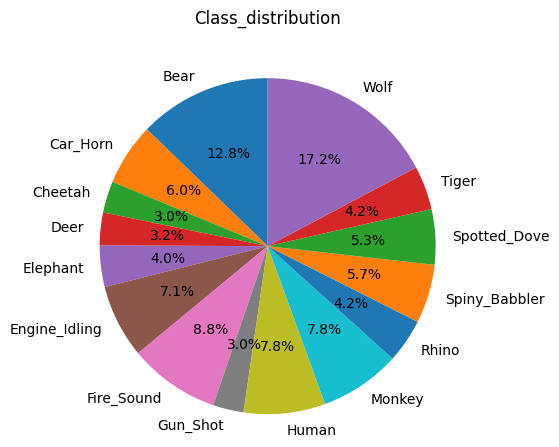

In [ ]:
fig,ax = plt.subplots()
ax.set_title('Class_distribution', y = 1.08)
ax.pie(class_dist, labels = class_dist.index, autopct = '%1.1f%%', shadow = False, startangle = 90)
ax.axis('equal')
# ax.bar(class_dist, label = class_dist.index, height = 10)

plt.show()

In [ ]:
df.reset_index(inplace=True)

#### Initialise some required variables for EDA (Exploratory Data Analysis)

In [ ]:
signals = {}
mfccs = {}
fft = {}
fbank={}

In [ ]:
print(len(signal))

72950


## Envelope Function for Audio Data Cleaning. Removing Infra frequencies

In [ ]:
def envelope(y,rate,thresold):
  mask = []
  y = pd.Series(y).apply(np.abs)
  y_mean = y.rolling(window = int(rate/10), min_periods = 1, center = True).mean()
  for mean in y_mean:
    if mean>thresold:
      mask.append(True)
    else: 
      mask.append(False)
  return mask

## Finding and Storing datas for more EDA

In [ ]:
for c in df.label:
  wav_file = df.loc[df['label'] == c, 'filename'].values[0]
  print(wav_file)
  path = os.path.join(train_path,c,wav_file)
  signal,rate = librosa.load(path,sr = 48000)
  mask = envelope(signal, rate, 0.0005)
  signal = signal[mask]
  signals[c] = signal
  fft[c] = np.fft.fft(signal)
  bank = logfbank(signal[:rate], rate, nfft = 1300, nfilt = 26).T
  fbank[c] = bank
  mel = mfcc(signal[:rate], rate, numcep = 13, nfilt = 26, nfft = 1300).T
  mfccs[c] = mel  

Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.wav
Rhinorhino97.w

## Functions for Plotting graphs - Signal, FFT, Fbank, MFCC

In [ ]:
def plot_signals(signals_dict):
    """
    Plots signals from a dictionary of audio files.
    
    Args:
    signals_dict (dict): A dictionary where the keys are the filenames of audio files
                         and the values are the corresponding audio signals as 1D numpy arrays.
    """
    num_plots = len(signals_dict)
    fig, axs = plt.subplots(num_plots, figsize=(5, 5*num_plots))
    
    for i, (classname, signal) in enumerate(signals_dict.items()):
        axs[i].plot(signal)
        axs[i].set_title(classname)
    
    plt.show()

def plot_fbank_data(fbank_dict):
    """
    Plots the fbank features of each class in a dictionary.
    
    Args:
    fbank_dict (dict): A dictionary where each key is a class name and the corresponding value is a 2D numpy array
    representing the fbank features of an audio signal.
    """
    num_plots = len(fbank_dict) 
    fig, axs = plt.subplots(nrows=3, ncols=5,figsize=(10, 8))

    plt.subplots_adjust(wspace=0.3, hspace=0.5)

    # Iterate over each class in the dictionary
    for i, class_name in enumerate(fbank_dict.keys()):
        row = i // 5
        col = i % 5
        fbank = fbank_dict[class_name]
        
        # Plot the fbank features
        im = axs[row, col].imshow(fbank.T, aspect='auto', origin='lower')
        axs[row, col].set_title(class_name)
        axs[row, col].set_xlabel('Frame')
        axs[row, col].set_ylabel('Filter')
        fig.colorbar(im, ax=axs[row, col])
    
    plt.show()

def plot_fft_data(fft_dict):
    """
    Plots the FFT features of each class in a dictionary.
    
    Args:
    fft_dict (dict): A dictionary where each key is a class name and the corresponding value is a 1D numpy array
    representing the FFT features of an audio signal.
    """
    fig, axs = plt.subplots(nrows=3, ncols=5,figsize=(10, 8))
    plt.subplots_adjust(wspace=0.3, hspace=0.5)

    # Iterate over each class in the dictionary
    for i, class_name in enumerate(fft_dict.keys()):
        row = i // 5
        col = i % 5
        fft = fft_dict[class_name]
        
        # Plot the FFT features
        axs[row,col].plot(np.abs(fft))
        axs[row,col].set_title(class_name)
        axs[row,col].set_xlabel('Frequency (Hz)')
        axs[row,col].set_ylabel('Magnitude')
    
    plt.show()

def plot_mfcc_data(mfcc_dict):
    """
    Plots the MFCC features of each class in a dictionary.
    
    Args:
    mfcc_dict (dict): A dictionary where each key is a class name and the corresponding value is a 2D numpy array
    representing the MFCC features of an audio signal.
    """
    fig, axs = plt.subplots(nrows=3, ncols=5,figsize=(10, 8))
    plt.subplots_adjust(wspace=0.3, hspace=0.5)

    # Iterate over each class in the dictionary
    for i, class_name in enumerate(mfcc_dict.keys()):
        row = i // 5
        col = i % 5
        mfcc = mfcc_dict[class_name]
        
        # Plot the MFCC features
        axs[row, col].imshow(mfcc.T, cmap='coolwarm', aspect='auto', origin='lower')
        axs[row, col].set_title(class_name)
        axs[row, col].set_xlabel('Frame')
        axs[row, col].set_ylabel('MFCC Coefficients')
    
    plt.show()

# Signal Plot - Frequency Plot

### A signal plot is a way to visualize a time-domain signal. It's a graph that shows the amplitude of the signal at each point in time. A signal plot is often used in signal processing applications to analyze and understand signals.

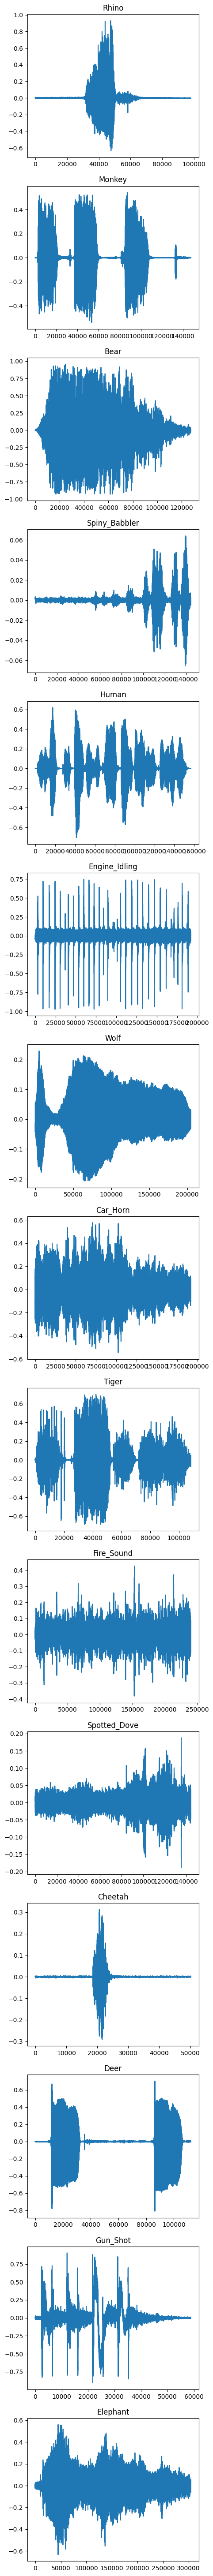

In [ ]:
plot_signals(signals)

# FFT Plot - Fast Fourier Transformation
### FFT stands for "Fast Fourier Transform," which is an algorithm used to quickly compute the Discrete Fourier Transform (DFT) of a signal. The DFT is a mathematical transform that takes a discrete-time signal as input and produces a spectrum of its frequency components as output.

### The FFT algorithm is particularly useful for computing the DFT of large signals efficiently. Without the FFT algorithm, computing the DFT of a signal requires O(N^2) time complexity, where N is the number of samples in the signal. The FFT algorithm, on the other hand, reduces the time complexity to O(NlogN), making it much faster for large signals.

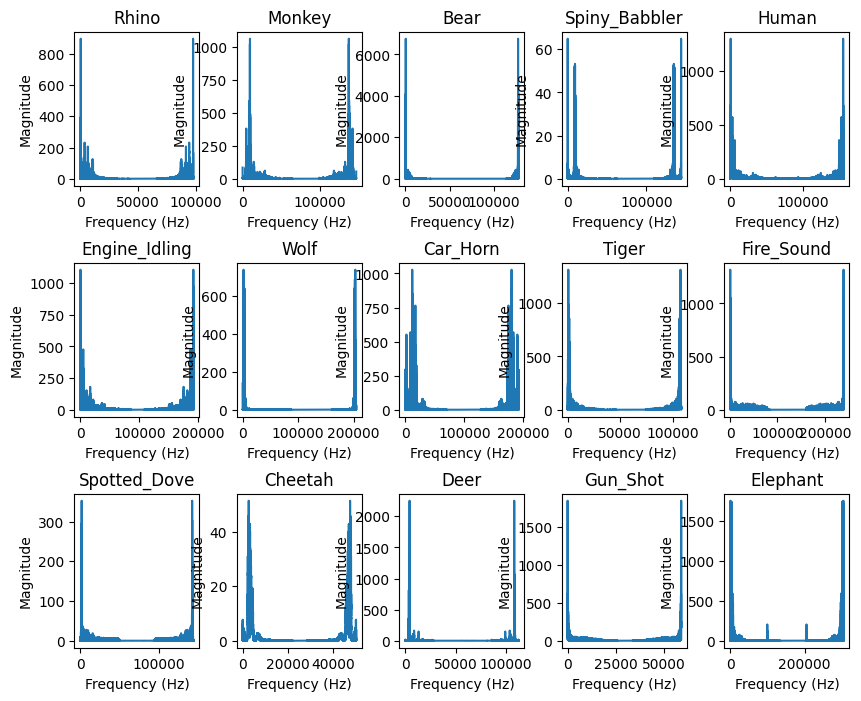

In [ ]:
plot_fft_data(fft)

# Fbank Plot - Filter Bank
### Filterbank features (fbanks) are another type of commonly used feature representation for speech and audio signals. Fbanks are similar to MFCCs in that they involve taking the DFT of short overlapping windows of the signal, but instead of mapping the resulting spectrum onto a set of mel-scale frequency bands, they apply a series of triangular band-pass filters to the spectrum.

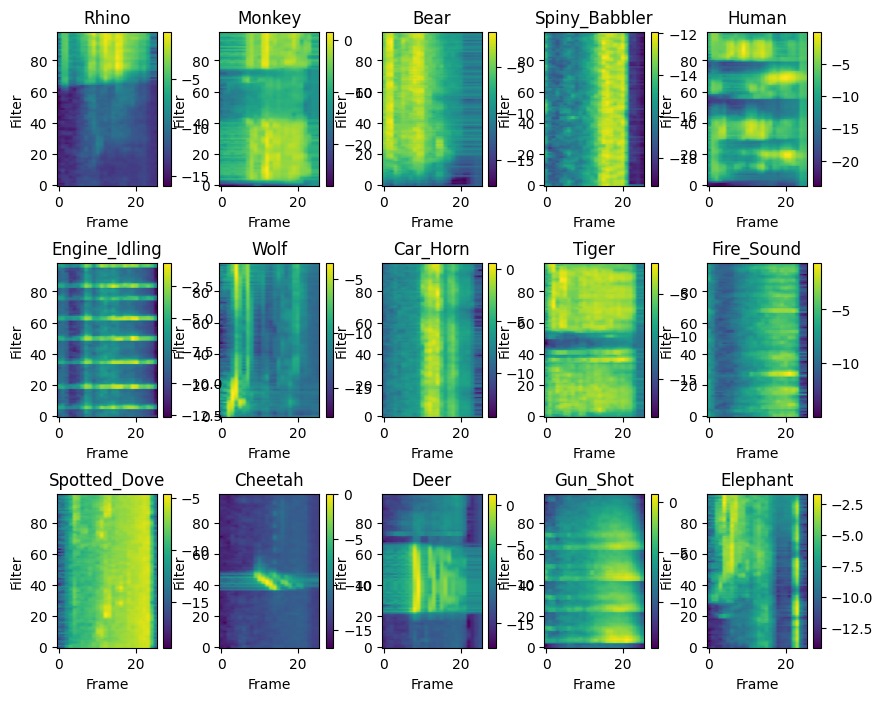

In [ ]:
plot_fbank_data(fbank)

# MFCC Plot
### Mel-frequency cepstral coefficients (MFCCs) are commonly used in speech and audio processing to represent the spectral content of audio signals. MFCCs are derived by taking the discrete Fourier transform (DFT) of short overlapping windows of the signal, and then mapping the resulting spectrum onto a set of mel-scale frequency bands. The logarithm of the energy in each band is then taken, followed by a discrete cosine transform (DCT) to produce a set of cepstral coefficients.

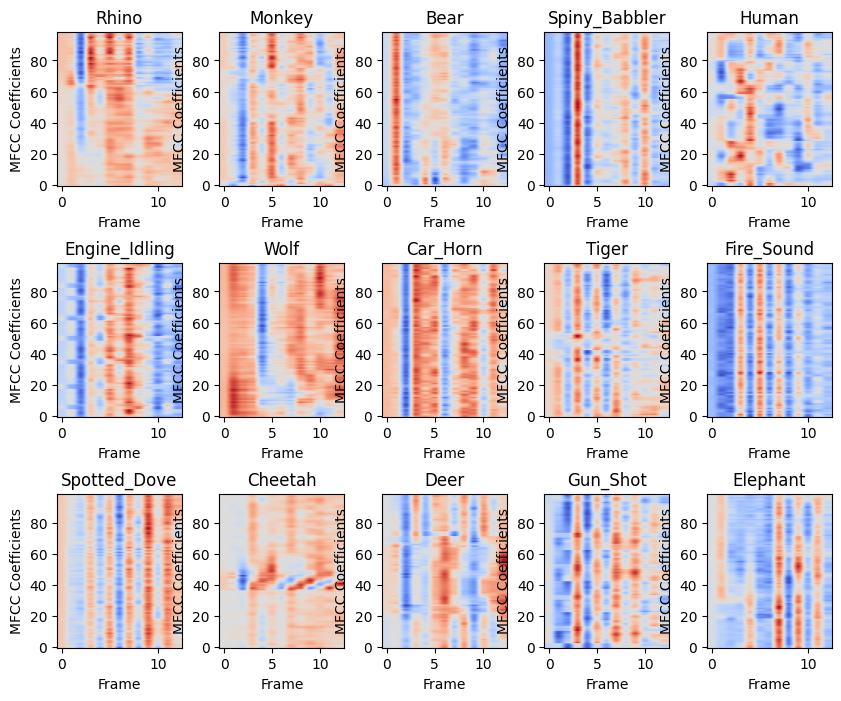

In [ ]:
plot_mfcc_data(mfccs)

## Create "Clean" directory to put cleaned data

In [ ]:
os.makedirs("/content/clean")

# Cleaning the data using Envelope Function

In [ ]:
filenames_to_drop = []
if len(os.listdir("/content/clean"))==0:
  for f in tqdm(df['filename']):
    print(type(f))
    lable = df.loc[df['filename'] == f, 'label'].values[0]
    # print(lable)
    file_path = os.path.join(train_path, lable, f)
    if os.path.exists(file_path):
      signal,rate = librosa.load(file_path, sr=12000)
      mask = envelope(signal, rate, 0.0005)
      wavfile.write(filename = "/content/clean/"+f, rate = rate, data = signal[mask])
    else:
      filenames_to_drop.append(f)
df = df[~df['filename'].isin(filenames_to_drop)]

  1%|          | 11/1328 [00:00<00:13, 100.71it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


  2%|▏         | 33/1328 [00:00<00:13, 99.15it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


  4%|▍         | 53/1328 [00:00<00:13, 93.84it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


  5%|▌         | 73/1328 [00:00<00:14, 86.40it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


  7%|▋         | 95/1328 [00:01<00:14, 87.61it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


  8%|▊         | 104/1328 [00:01<00:16, 75.68it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


  8%|▊         | 112/1328 [00:01<00:18, 66.64it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 10%|▉         | 128/1328 [00:01<00:17, 68.25it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 11%|█         | 143/1328 [00:01<00:20, 58.15it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 11%|█▏        | 151/1328 [00:01<00:19, 60.81it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 12%|█▏        | 164/1328 [00:02<00:22, 52.09it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 13%|█▎        | 170/1328 [00:02<00:25, 46.01it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 14%|█▍        | 184/1328 [00:02<00:21, 53.11it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 14%|█▍        | 190/1328 [00:02<00:25, 44.16it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 15%|█▌        | 200/1328 [00:03<00:28, 40.21it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 16%|█▌        | 210/1328 [00:03<00:29, 38.09it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 16%|█▌        | 215/1328 [00:03<00:33, 33.05it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 17%|█▋        | 224/1328 [00:03<00:35, 31.17it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 17%|█▋        | 228/1328 [00:04<00:42, 25.80it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 18%|█▊        | 242/1328 [00:04<00:27, 40.01it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 19%|█▊        | 247/1328 [00:04<00:29, 36.45it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 19%|█▉        | 252/1328 [00:04<00:34, 30.98it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 20%|██        | 266/1328 [00:05<00:23, 44.96it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 20%|██        | 272/1328 [00:05<00:45, 23.41it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 21%|██        | 282/1328 [00:05<00:35, 29.54it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 22%|██▏       | 292/1328 [00:06<00:31, 32.82it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 23%|██▎       | 301/1328 [00:06<00:28, 35.57it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 23%|██▎       | 311/1328 [00:06<00:25, 39.96it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 24%|██▍       | 316/1328 [00:06<00:25, 39.44it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 25%|██▍       | 326/1328 [00:06<00:24, 40.67it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 25%|██▌       | 336/1328 [00:07<00:24, 39.83it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 26%|██▌       | 341/1328 [00:07<00:26, 37.67it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 26%|██▋       | 350/1328 [00:07<00:24, 39.14it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 27%|██▋       | 359/1328 [00:07<00:24, 38.88it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 28%|██▊       | 367/1328 [00:08<00:26, 36.33it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 28%|██▊       | 375/1328 [00:08<00:26, 35.36it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 29%|██▉       | 383/1328 [00:08<00:26, 35.67it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 29%|██▉       | 387/1328 [00:08<00:27, 33.92it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 30%|██▉       | 396/1328 [00:08<00:26, 35.47it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 30%|███       | 404/1328 [00:09<00:26, 35.24it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 31%|███▏      | 417/1328 [00:09<00:18, 48.82it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 32%|███▏      | 430/1328 [00:09<00:16, 55.57it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 33%|███▎      | 443/1328 [00:09<00:15, 56.57it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 34%|███▍      | 455/1328 [00:09<00:15, 57.05it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 35%|███▌      | 467/1328 [00:10<00:15, 57.32it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 36%|███▌      | 480/1328 [00:10<00:14, 57.12it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 37%|███▋      | 493/1328 [00:10<00:14, 58.87it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 38%|███▊      | 505/1328 [00:10<00:14, 58.13it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 39%|███▉      | 518/1328 [00:11<00:13, 58.76it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 40%|███▉      | 530/1328 [00:11<00:13, 57.94it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 40%|████      | 536/1328 [00:11<00:14, 54.96it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 41%|████      | 547/1328 [00:11<00:18, 41.99it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 42%|████▏     | 552/1328 [00:11<00:20, 38.15it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 42%|████▏     | 557/1328 [00:12<00:22, 33.64it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 43%|████▎     | 565/1328 [00:12<00:27, 27.81it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 43%|████▎     | 568/1328 [00:12<00:30, 24.88it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 43%|████▎     | 575/1328 [00:12<00:29, 25.75it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 44%|████▍     | 583/1328 [00:13<00:27, 27.21it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 44%|████▍     | 589/1328 [00:13<00:30, 24.59it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 45%|████▍     | 596/1328 [00:13<00:29, 25.03it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 45%|████▌     | 602/1328 [00:13<00:28, 25.86it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 46%|████▌     | 605/1328 [00:14<00:30, 23.89it/s]

<class 'str'>
<class 'str'>
<class 'str'>


 46%|████▌     | 611/1328 [00:14<00:37, 19.27it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 46%|████▌     | 614/1328 [00:14<00:37, 19.21it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 47%|████▋     | 619/1328 [00:14<00:28, 24.62it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 47%|████▋     | 627/1328 [00:15<00:26, 26.74it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 48%|████▊     | 640/1328 [00:15<00:17, 40.32it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 49%|████▉     | 652/1328 [00:15<00:13, 48.61it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 50%|█████     | 666/1328 [00:15<00:11, 56.65it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 51%|█████     | 679/1328 [00:15<00:11, 58.36it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 52%|█████▏    | 692/1328 [00:16<00:10, 59.82it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 53%|█████▎    | 706/1328 [00:16<00:10, 59.90it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 54%|█████▍    | 723/1328 [00:16<00:08, 70.40it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 56%|█████▌    | 742/1328 [00:16<00:07, 80.74it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 57%|█████▋    | 761/1328 [00:16<00:06, 85.99it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 59%|█████▊    | 779/1328 [00:17<00:06, 78.93it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 60%|█████▉    | 795/1328 [00:17<00:06, 76.54it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 60%|██████    | 803/1328 [00:17<00:07, 73.75it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 62%|██████▏   | 818/1328 [00:17<00:07, 66.24it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 63%|██████▎   | 832/1328 [00:18<00:08, 60.99it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 63%|██████▎   | 839/1328 [00:18<00:08, 61.03it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 64%|██████▍   | 853/1328 [00:18<00:07, 59.38it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 65%|██████▌   | 867/1328 [00:18<00:07, 60.72it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 66%|██████▋   | 881/1328 [00:18<00:07, 60.48it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 67%|██████▋   | 896/1328 [00:19<00:06, 65.37it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 68%|██████▊   | 903/1328 [00:19<00:06, 61.86it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 69%|██████▉   | 916/1328 [00:19<00:07, 51.52it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 69%|██████▉   | 922/1328 [00:19<00:08, 49.87it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 70%|███████   | 933/1328 [00:19<00:08, 47.64it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 71%|███████   | 943/1328 [00:20<00:08, 45.03it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 72%|███████▏  | 953/1328 [00:20<00:08, 43.60it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 73%|███████▎  | 963/1328 [00:20<00:08, 43.41it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 73%|███████▎  | 974/1328 [00:20<00:07, 47.28it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 75%|███████▍  | 992/1328 [00:21<00:05, 67.18it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 76%|███████▌  | 1006/1328 [00:21<00:04, 67.68it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 77%|███████▋  | 1020/1328 [00:21<00:04, 65.95it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 78%|███████▊  | 1034/1328 [00:21<00:04, 62.43it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 79%|███████▉  | 1048/1328 [00:21<00:04, 59.54it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 80%|███████▉  | 1062/1328 [00:22<00:04, 62.65it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 80%|████████  | 1069/1328 [00:22<00:04, 59.43it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 82%|████████▏ | 1083/1328 [00:22<00:03, 62.37it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 83%|████████▎ | 1097/1328 [00:22<00:03, 61.21it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 84%|████████▎ | 1111/1328 [00:22<00:03, 60.84it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 85%|████████▌ | 1129/1328 [00:23<00:02, 71.98it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 87%|████████▋ | 1153/1328 [00:23<00:01, 88.46it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 89%|████████▊ | 1176/1328 [00:23<00:01, 95.59it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 90%|█████████ | 1199/1328 [00:23<00:01, 102.95it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 91%|█████████ | 1211/1328 [00:24<00:01, 104.49it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 93%|█████████▎| 1236/1328 [00:24<00:00, 107.12it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 95%|█████████▍| 1258/1328 [00:24<00:00, 98.21it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 96%|█████████▋| 1279/1328 [00:24<00:00, 91.48it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 98%|█████████▊| 1300/1328 [00:24<00:00, 96.54it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


 99%|█████████▉| 1320/1328 [00:25<00:00, 90.42it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


100%|██████████| 1328/1328 [00:25<00:00, 52.60it/s]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [ ]:
# shutil.rmtree("/content/clean")

## More tool functions for preprocessing the Data

In [ ]:
class Config:
  def __init__(self, mode = "conv", nfilt = 26, nfeat = 13, nfft = 512, rate = 12000):
    self.mode = mode
    self.nfilt = nfilt
    self.nfeat = nfeat
    self.nfft = nfft
    self.rate = rate
    self.step = int(rate/10)

In [ ]:
# df.set_index('filename', inplace = True)
print(df.index)
def build_random_feat():
  df = pd.read_csv("/content/audio_data.csv")
  classes = list(np.unique(df.label))
  print(classes)
  X = []
  y = []
  # print(type(X))
  _min,_max = float('inf'), -float('inf')
  for _ in tqdm(range(n_samples)):
    # print(type(X))
    rand_class = np.random.choice(class_dist.index, p = prob_dist)
    filname = np.random.choice(df.loc[df['label'] == rand_class, 'filename'].values)
    f = np.random.choice(df.loc[df['label'] == rand_class, 'filename'].index)
    if os.path.exists(os.path.join('/content/clean', filname)):
      rate,wav = wavfile.read('/content/clean/' + filname)
      label = df.at[f, 'label']
    # print(wav.shape[0])
    try:
      rand_index = np.random.randint(0, wav.shape[0]-conf.step)
      # print(rand_index)
      sample = wav[rand_index:rand_index+conf.step]
      X_sample = mfcc(sample, rate, numcep = conf.nfeat, nfilt = conf.nfilt, nfft = conf.nfft).T
      _min = min(np.amin(X_sample), _min)
      _max = max(np.amax(X_sample), _max)

    except Exception as e:
      print(e)
      df = df.drop(df[df['filename'] == filname].index)
      os.remove('/content/clean/' + filname)
    
    # print(type(X))
      # X = X.to_list()
    X.append(X_sample if conf.mode == "conv" else X_sample.T)
    y.append(classes.index(label))
    # print(X)
  print(X)
  X = np.array(X)
  print(X)
  y = np.array(y)
  X = (X - _min)/(_max-_min)
  
  if conf.mode == "conv":
    X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
  elif conf.mode == "time":
    X = X.reshape(X.shape[0], X.shape[1], X.shape[2])
  y = to_categorical(y, num_classes = 15)
  return X, y

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327],
           dtype='int64', length=1311)


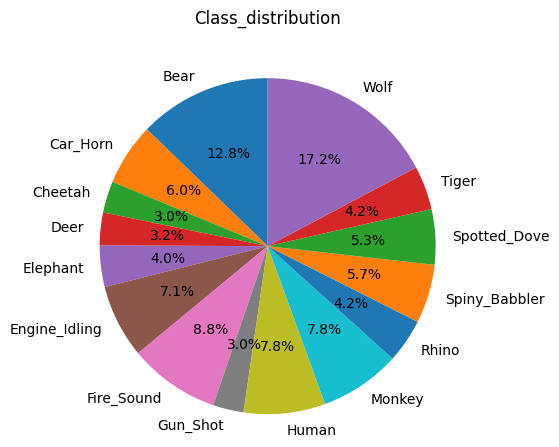

In [ ]:
n_samples = 2 * int(df['length'].sum() /0.1)
# taking the Samples from the Audio
prob_dist = class_dist/class_dist.sum()
# Calculation Probabilistic Distribution for each Class
choices = np.random.choice(class_dist.index, p = prob_dist )
#print(choices)
#testing the probabilistic Distribution

#Plot again for better insight
fig,ax = plt.subplots()
ax.set_title('Class_distribution', y = 1.08)
ax.pie(class_dist, labels = class_dist.index, autopct = '%1.1f%%', shadow = False, startangle = 90)
ax.axis('equal')
# ax.bar(class_dist, label = class_dist.index, height = 10)

plt.show()

In [ ]:
conf = Config(mode = "conv") #Initialise Conf Object of Config Class with mode = "conv"

# Modelling
### Modelling a CNN

In [ ]:
# @tf.function(experimental_compile=True)
def get_conv_model(input_shape):
  model = Sequential()
  model.add(Conv2D(16, (3,3), activation = 'relu', strides = (1,1), padding = "same", input_shape = input_shape))
  model.add(Conv2D(32, (3,3), activation = 'relu', strides = (1,1), padding = "same"))
  model.add(Conv2D(64, (3,3), activation = 'relu', strides = (1,1), padding = "same"))
  model.add(Conv2D(128, (3,3), activation = 'relu', strides = (1,1), padding = "same"))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(128, activation = "relu"))
  model.add(Dense(64, activation = "relu"))
  model.add(Dense(15, activation = "softmax"))
  model.summary()
  model.compile(loss = "categorical_crossentropy",
                optimizer = "adam",
                metrics = ['accuracy'])
  return model

## Carrying out data prerpocessing and feed into Network

In [ ]:
if conf.mode == "conv":
  X,y = build_random_feat()
  y_flat = np.argmax(y, axis = 1)
  input_shape = (X.shape[1], X.shape[2],1)
  model = get_conv_model(input_shape)
elif conf.mode == "time":
  X,y = build_random_feat()
  input_shape = (X.shape[1], X.shape[2])
  model = get_rec_model()

['Bear', 'Car_Horn', 'Cheetah', 'Deer', 'Elephant', 'Engine_Idling', 'Fire_Sound', 'Gun_Shot', 'Human', 'Monkey', 'Rhino', 'Spiny_Babbler', 'Spotted_Dove', 'Tiger', 'Wolf']


  1%|          | 566/98700 [00:01<03:12, 508.94it/s]

high <= 0


  1%|          | 720/98700 [00:01<03:16, 498.62it/s]

high <= 0


100%|██████████| 98700/98700 [03:35<00:00, 458.73it/s]
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 9, 16)         160       
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 9, 32)         4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 9, 64)         18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 9, 128)        73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 4, 128)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 6, 4, 128)         0         
                                                        

In [ ]:
class_weight = compute_class_weight(class_weight = 'balanced', classes = np.unique(y_flat), y = y_flat)
model.fit(X,y, epochs = 10, shuffle = True, batch_size = 32, validation_split = 0.1)

Epoch 1/10
2776/2776 [==============================] - 33s 6ms/step - loss: 1.0583 - accuracy: 0.6667 - val_loss: 0.7521 - val_accuracy: 0.7639
Epoch 2/10
2776/2776 [==============================] - 15s 6ms/step - loss: 0.6853 - accuracy: 0.7847 - val_loss: 0.5493 - val_accuracy: 0.8286
Epoch 3/10
2776/2776 [==============================] - 16s 6ms/step - loss: 0.5581 - accuracy: 0.8232 - val_loss: 0.4482 - val_accuracy: 0.8570
Epoch 4/10
2776/2776 [==============================] - 15s 6ms/step - loss: 0.4739 - accuracy: 0.8491 - val_loss: 0.4145 - val_accuracy: 0.8697
Epoch 5/10
2776/2776 [==============================] - 17s 6ms/step - loss: 0.4187 - accuracy: 0.8670 - val_loss: 0.3542 - val_accuracy: 0.8867
Epoch 6/10
2776/2776 [==============================] - 17s 6ms/step - loss: 0.3782 - accuracy: 0.8789 - val_loss: 0.3267 - val_accuracy: 0.8971
Epoch 7/10
2776/2776 [==============================] - 16s 6ms/step - loss: 0.3467 - accuracy: 0.8880 - val_loss: 0.4083 - val_ac

In [ ]:
model.save("animalAudio.h5")

In [ ]:
def model_prediction(file_path):
  signal,rate = librosa.load(file_path, sr=12000)
  mask = envelope(signal, rate, 0.0005)

  signal = signal[mask]
  print(signal.shape)
  rand_index = np.random.randint(0, signal.shape[0]-conf.step)
  signal = signal[rand_index:rand_index+conf.step]
  
  X_sample = mfcc(signal, rate, numcep = conf.nfeat, nfilt = conf.nfilt, nfft = 512).T
  _min = np.amin(X_sample)
  _max = np.amax(X_sample)

  sample = (X_sample - _min)/(_max - _min)

  sample = sample.reshape(1, sample.shape[0], sample.shape[1], 1)
  y_hat = model.predict(sample)
  return y_hat

In [ ]:
prediction = model_prediction("/content/data/test/Car_Horn/153057-1-0-0.wav")
print(np.argmax(prediction))

(13189,)
1/1 [==============================] - 0s 19ms/step
9


In [ ]:
print(classes)  

NameError: ignored